In [ ]:
import best_team

In [24]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  
from nltk import word_tokenize,sent_tokenize 
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

In [6]:
# from google.colab import files
# uploaded = files.upload()
# import pandas as pd
# import io

# df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
# df

Saving train.csv to train (1).csv


,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [9]:
df.head(5)

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [10]:
df_info = df.drop(['CreationDate','Y'],axis=1)
df_info.head()

,Id,Title,Body,Tags
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...


In [11]:
df_info['Full_Text'] = df_info['Title'] + ' ' + df_info['Body']

In [12]:
df_info.head()

,Id,Title,Body,Tags,Full_Text
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,Java: Repeat Task Every Random Seconds <p>I'm ...
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,Why are Java Optionals immutable? <p>I'd like ...
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,Text Overlay Image with Darkened Opacity React...
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,Why ternary operator in swift is so picky? <p>...
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,hide/show fab with scale animation <p>I'm usin...


In [13]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [14]:
df_info['Cleaned_Text'] = df_info['Full_Text'].apply(clean_text)

In [15]:
df_info.head()

,Id,Title,Body,Tags,Full_Text,Cleaned_Text
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,Java: Repeat Task Every Random Seconds <p>I'm ...,Java Repeat Task Every Random Seconds already ...
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,Why are Java Optionals immutable? <p>I'd like ...,Java Optionals immutable like understand Java ...
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,Text Overlay Image with Darkened Opacity React...,Text Overlay Image Darkened Opacity React Nati...
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,Why ternary operator in swift is so picky? <p>...,ternary operator swift picky question simple c...
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,hide/show fab with scale animation <p>I'm usin...,hide/show scale animation using custom floatin...


In [16]:
print(df_info['Full_Text'].iloc[0])
print(df_info['Cleaned_Text'].iloc[0])

Java: Repeat Task Every Random Seconds <p>I'm already familiar with repeating tasks every n seconds by using Java.util.Timer and Java.util.TimerTask. But lets say I want to print "Hello World" to the console every random seconds from 1-5. Unfortunately I'm in a bit of a rush and don't have any code to show so far. Any help would be apriciated.  </p>

Java Repeat Task Every Random Seconds already familiar repeating task every second using Java.util.Timer Java.util.TimerTask let want print Hello World console every random second Unfortunately rush code show help would apriciated


In [17]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=100000)
# to play with. min_df,max_df,max_features


In [18]:
vect_text=vect.fit_transform(df_info['Cleaned_Text'])


In [20]:
#The lesser the value the more common is the word
print(vect_text.shape)
print(vect_text)
# pd.DataFrame(vect_text.toarray(), index=df_info, columns=vect_text.get_feature_names()).head(10)

(45000, 100000)
  (0, 13126)	0.28437667425335417
  (0, 98326)	0.07726947025790266
  (0, 42792)	0.07266842254944701
  (0, 82043)	0.09613697558340592
  (0, 22494)	0.04047455963423819
  (0, 78129)	0.2616792686057336
  (0, 93420)	0.15568661200985054
  (0, 24257)	0.1016237265328333
  (0, 98307)	0.14798018785695316
  (0, 42759)	0.12539279463854267
  (0, 70830)	0.09579050646500921
  (0, 97009)	0.06308775896436147
  (0, 52228)	0.16871985075219367
  (0, 90552)	0.2616792686057336
  (0, 90541)	0.18162165524182378
  (0, 94991)	0.27467814315171574
  (0, 94917)	0.060901533714805625
  (0, 79724)	0.22033324593755332
  (0, 75659)	0.1988735082805988
  (0, 34208)	0.19017649100071762
  (0, 11591)	0.11693517452614963
  (0, 79773)	0.19642060732022998
  (0, 73599)	0.2658530887428098
  (0, 33266)	0.34003565979187994
  (0, 88078)	0.25970991132067206
  :	:
  (44999, 52844)	0.11472596646651051
  (44999, 65341)	0.16846126791228547
  (44999, 86158)	0.24042388245484447
  (44999, 96418)	0.27455063964308235
  (44999,

In [21]:
idf=vect.idf_

In [22]:
idf

array([ 5.20567085,  6.46741592,  7.17114521, ..., 11.02129281,
       11.02129281, 11.02129281])

In [36]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)

print(l[0],l[-1])
print(l[1],l[-50])
print(l[2],l[-100])
print(l[3],l[-10])

code 𝒇𝒍𝒐𝒂𝒕
pre السيرفر
using изображения
want 执行耗时


In [34]:
print(dd['code'], dd['𝒇𝒍𝒐𝒂𝒕'])

1.510921922558997 11.021292810167823


In [39]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=10, random_state=42)

lsa_fitted=lsa_model.fit_transform(vect_text)

In [40]:
print(lsa_fitted)
print(lsa_fitted.shape)

[[ 0.11252824 -0.01120833 -0.07719381]
 [ 0.03255837  0.00214949 -0.03641748]
 [ 0.12877048  0.11249415 -0.00378092]
 ...
 [ 0.05768995  0.00933667 -0.04978145]
 [ 0.0551984   0.01312807 -0.04690431]
 [ 0.10341391  0.04266866 -0.06517683]]
(45000, 3)


In [47]:
l=lsa_fitted[0]
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic)

Topic  0  :  0.11252824467941289
Topic  1  :  -0.011208327488042704
Topic  2  :  -0.07719381264477103


In [42]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
code pre string http file com class value array function 

Topic 1: 
imgur stack com http png image android description href enter 

Topic 2: 
code http imgur stack png com pre noreferrer rel href 



In [44]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=3,learning_method='online',random_state=42,max_iter=1)
lda_fitted=lda_model.fit_transform(vect_text)


In [45]:
print(lda_fitted.shape)  # (no_of_doc,no_of_topics)
print(lda_fitted)

(45000, 3)
[[0.06188283 0.87617818 0.06193899]
 [0.09885101 0.80226005 0.09888894]
 [0.57305006 0.3915934  0.03535654]
 ...
 [0.08191376 0.83618802 0.08189822]
 [0.06025538 0.87953044 0.06021418]
 [0.04921723 0.90191151 0.04887126]]


In [48]:
for i,topic in enumerate(lda_fitted[0]):
  print("Topic ",i,": ",topic)

Topic  0 :  0.06188282968912277
Topic  1 :  0.8761781763042891
Topic  2 :  0.061938994006588075


In [49]:
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
color react width docker height background font style icon gradle 

Topic 1: 
code string value file pre http array want com class 

Topic 2: 
amet dolor ipsum nombre para nome resultado como dword numero 



In [50]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

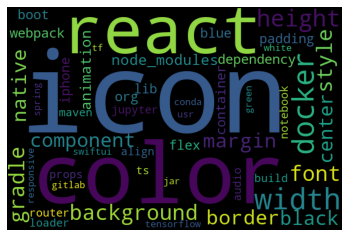

In [51]:
draw_word_cloud(0)

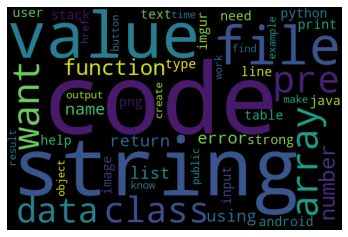

In [52]:
draw_word_cloud(1)

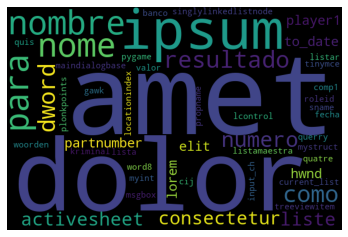

In [53]:
draw_word_cloud(2)